In [1]:
import pandas as pd
import numpy as np 
from scipy.stats import pearsonr, spearmanr
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [6]:
import os
from tqdm.notebook import tqdm
from scipy.stats import spearmanr
#Plot twin gene-gene correlation over time
# Helper function for correlation
def compute_diff_correlation(rep1, rep2):
    diff_tf = rep1['total_TF_mRNA'] - rep2['total_TF_mRNA']
    diff_target = rep1['total_Target_mRNA'] - rep2['total_Target_mRNA']
    return spearmanr(diff_tf, diff_target)[0]


# Compute correlations at a time point
# def get_correlations(df, time):
#     df = df[df['sampling_time'] == time].reset_index(drop=True)
#     corr_gene_gene = spearmanr(df['total_TF_mRNA'], df['total_Target_mRNA'])[0]

#     rep1 = df[df['replicate'] == 0].reset_index(drop=True)
#     rep2 = df[df['replicate'] == 1].reset_index(drop=True)

#     corr_twin_pair = compute_diff_correlation(rep1, rep2)
#     rep2_random = rep2.sample(frac=1, random_state=0, ignore_index=True)
#     corr_random_pair = compute_diff_correlation(rep1, rep2_random)

#     return corr_gene_gene, corr_twin_pair, corr_random_pair

def get_correlations(df, time):
    df = df[df['sampling_time'] == time].reset_index(drop=True)

    
    
    # Extract replicates
    rep1 = df[df['replicate'] == 0].reset_index(drop=True)
    rep2 = df[df['replicate'] == 1].reset_index(drop=True)
    # Compute delta correlation on valid twins
    corr_twin_pair = compute_diff_correlation(rep1, rep2)
    # Gene-gene correlation in the full population
    df_corr = pd.concat([rep2, rep1], axis=0)
    corr_gene_gene = spearmanr(df_corr['total_TF_mRNA'], df_corr['total_Target_mRNA'])[0]
    # Random shuffle of rep2
    rep2_random = rep2.sample(frac=1, random_state=0, ignore_index=True)
    corr_random_pair = compute_diff_correlation(rep1, rep2_random)

    return corr_gene_gene, corr_twin_pair, corr_random_pair


# Parallelized task per simulation
def process_simulation_single_population(sim, path_to_folder, time_points, run = 0):
    sim_path = os.path.join(path_to_folder, sim)
    population = pd.read_csv(sim_path, index_col=0)

    corr_dict_list = []
    for time in (time_points):
        gene_gene_corr, twin_pair_corr, random_pair_corr = get_correlations(population, time)
        #Plotting the correlations
        # plot_correlations(population, time)
        corr_dict_row = {
            'time_point': time,
            'gene_gene_correlation': gene_gene_corr,
            'twin_pair_correlation': twin_pair_corr,
            'random_pair_correlation': random_pair_corr,
            'run': run
        }
        corr_dict_list.append(corr_dict_row)
    
    corr_dict_df = pd.DataFrame(corr_dict_list)
    return corr_dict_df

path_to_folder = "/home/mzo5929/Keerthana/grnInference/simulationData/simulations_parameter_scan/mrna_half_life_tf/"
corr_dict_list = []
for file in tqdm(os.listdir(path_to_folder)):
    if file.endswith(".csv") and "samples_replicates_over_time_with_regulation_param_index_" in file:
        print(file)
        sim = file
        time_points = np.arange(0, 1441, 60)
        run = int(sim.split('_')[-1].replace('.csv', ''))
        index = sim.split('_')[-3]
        corr_dict = process_simulation_single_population(sim, path_to_folder, time_points, run = run)
        corr_dict['index'] = index
        corr_dict_list.append(corr_dict)

corr_dict_list = pd.concat(corr_dict_list, ignore_index=True)


  0%|          | 0/100 [00:00<?, ?it/s]

samples_replicates_over_time_with_regulation_param_index_63_run_1.csv
samples_replicates_over_time_with_regulation_param_index_68_run_4.csv
samples_replicates_over_time_with_regulation_param_index_61_run_8.csv
samples_replicates_over_time_with_regulation_param_index_65_run_5.csv
samples_replicates_over_time_with_regulation_param_index_61_run_9.csv
samples_replicates_over_time_with_regulation_param_index_68_run_0.csv
samples_replicates_over_time_with_regulation_param_index_64_run_7.csv
samples_replicates_over_time_with_regulation_param_index_66_run_8.csv
samples_replicates_over_time_with_regulation_param_index_69_run_9.csv
samples_replicates_over_time_with_regulation_param_index_64_run_9.csv
samples_replicates_over_time_with_regulation_param_index_65_run_4.csv
samples_replicates_over_time_with_regulation_param_index_64_run_1.csv
samples_replicates_over_time_with_regulation_param_index_68_run_5.csv
samples_replicates_over_time_with_regulation_param_index_67_run_0.csv
samples_replicates_o

In [11]:
corr_dict_list[corr_dict_list['time_point'] == 120]

,time_point,gene_gene_correlation,twin_pair_correlation,random_pair_correlation,run,index
527,120,0.033570,0.015666,0.021167,2,60
927,120,0.023750,0.016091,0.015609,7,60
952,120,0.029541,0.001417,0.029164,1,60
977,120,0.030076,0.005024,0.023572,6,60
1102,120,0.037024,0.012743,0.027152,4,60
...,...,...,...,...,...,...
1027,120,0.145037,0.004312,0.134609,8,69
1227,120,0.147958,0.011973,0.136245,6,69
1502,120,0.143070,-0.003570,0.129991,7,69
1577,120,0.140408,-0.004124,0.123064,5,69


index: 60


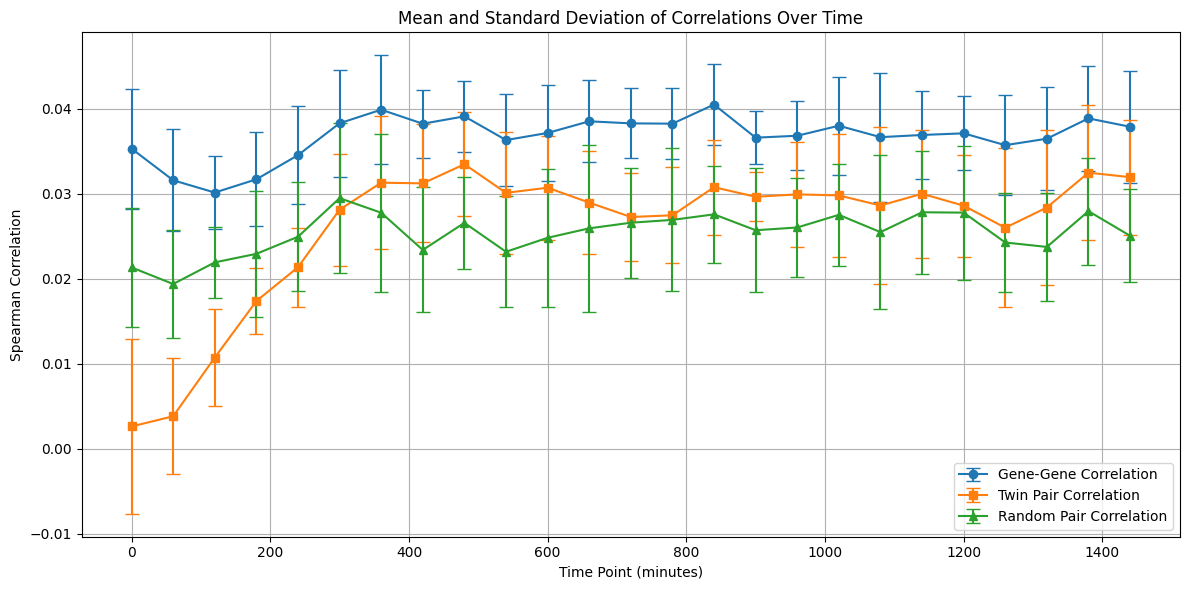

index: 61


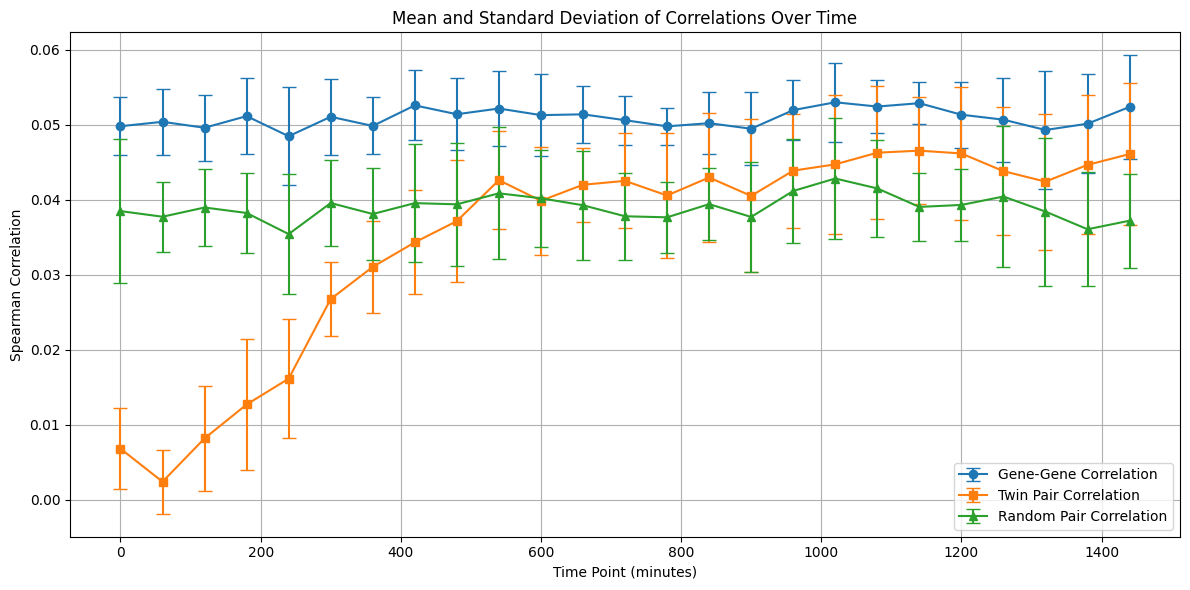

index: 62


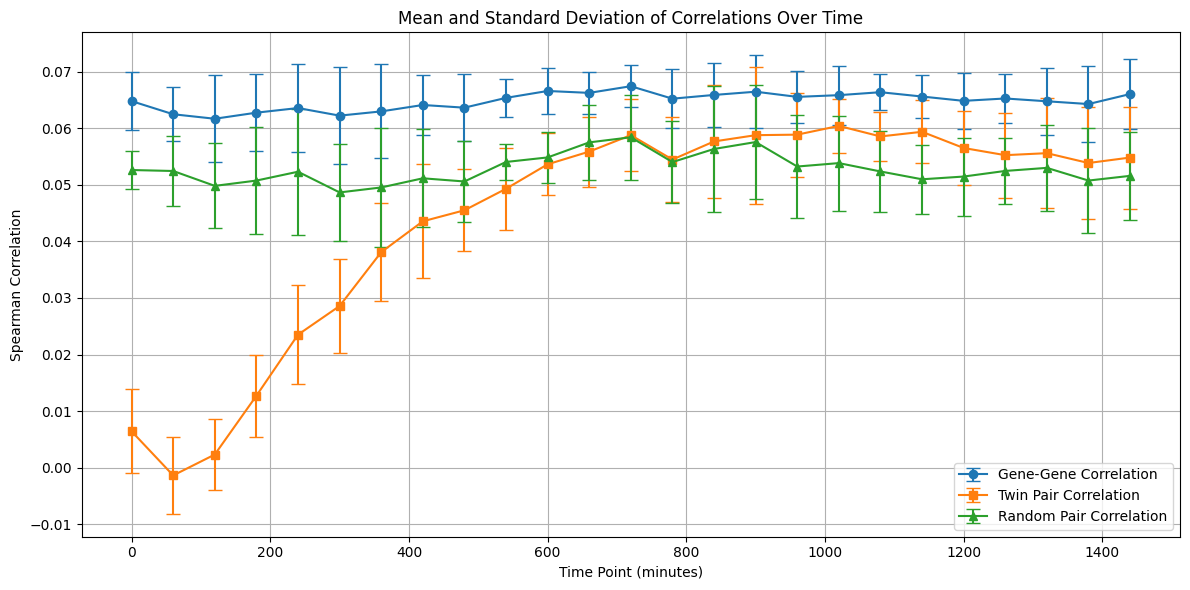

index: 63


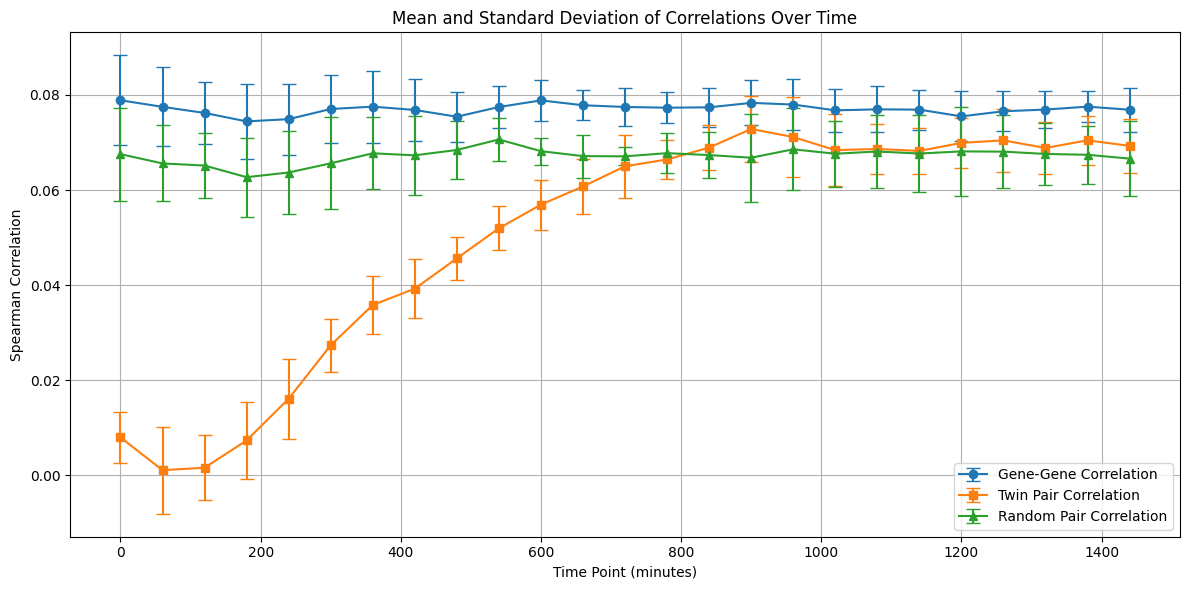

index: 64


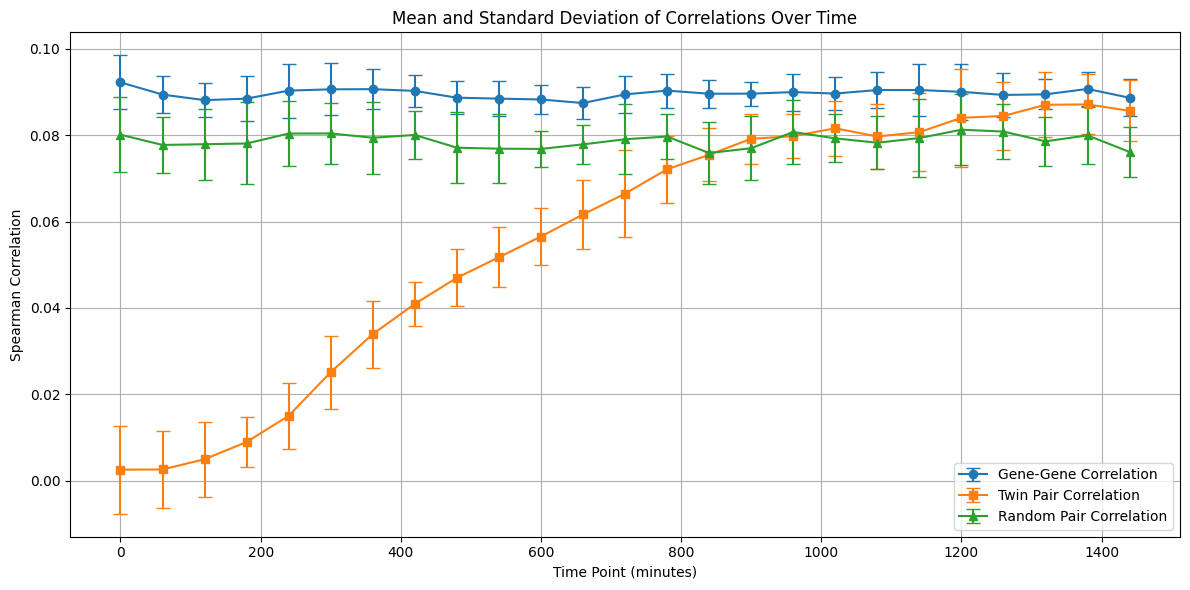

index: 65


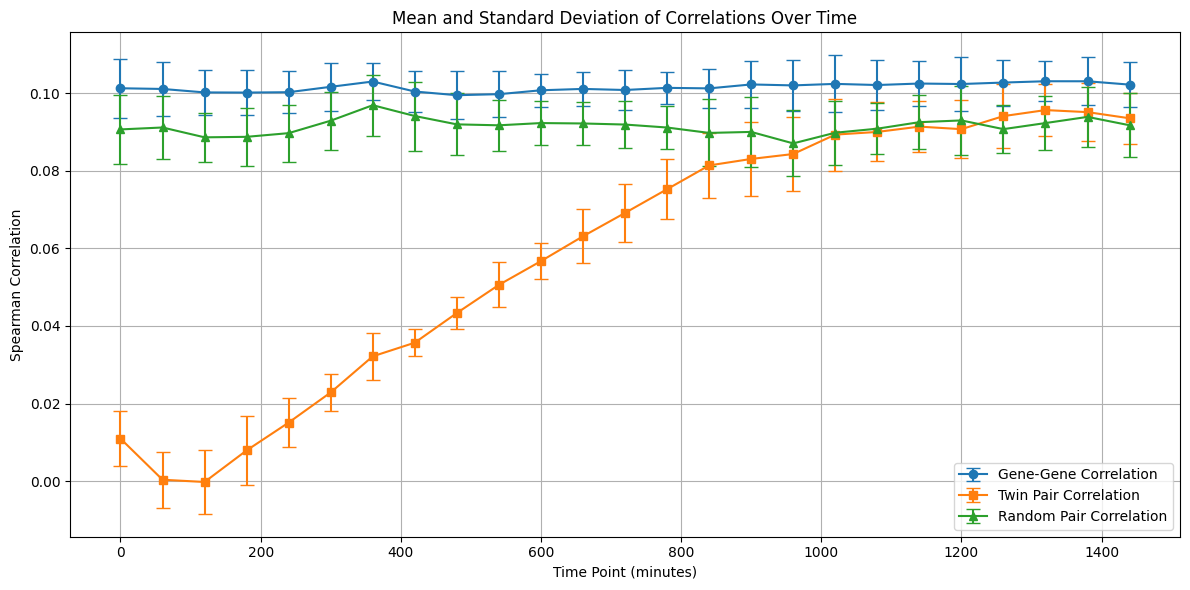

index: 66


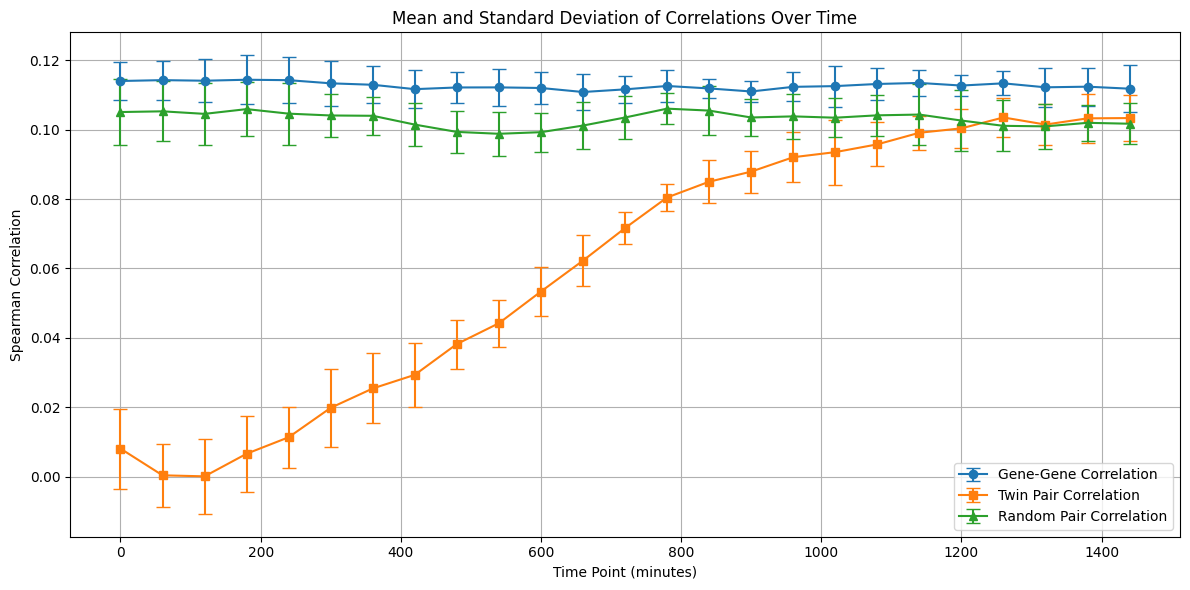

index: 67


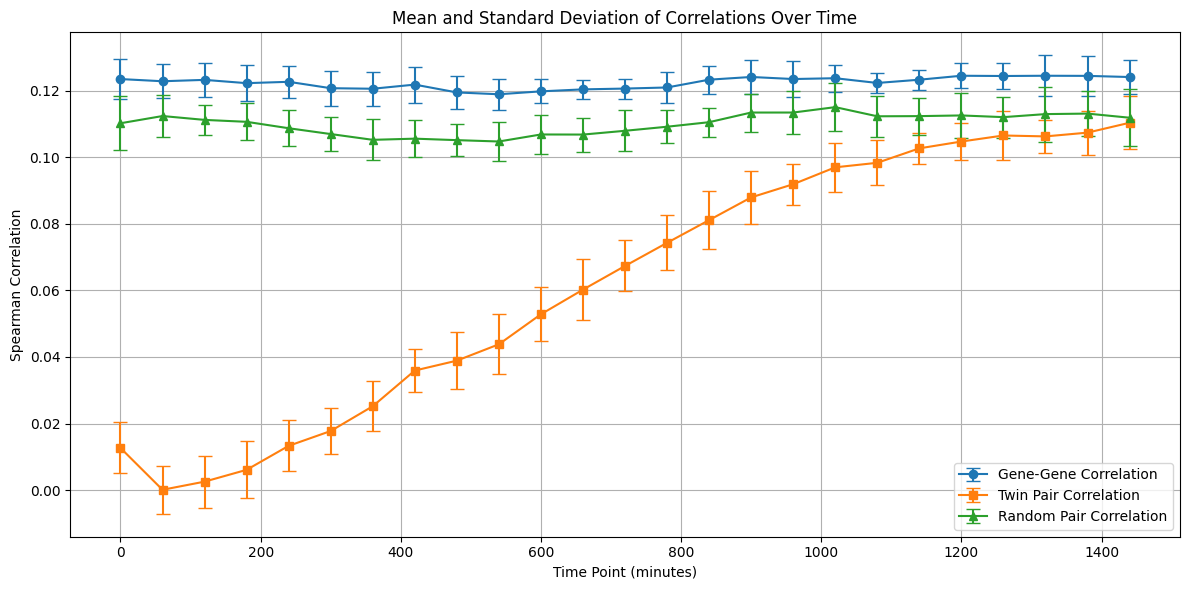

index: 68


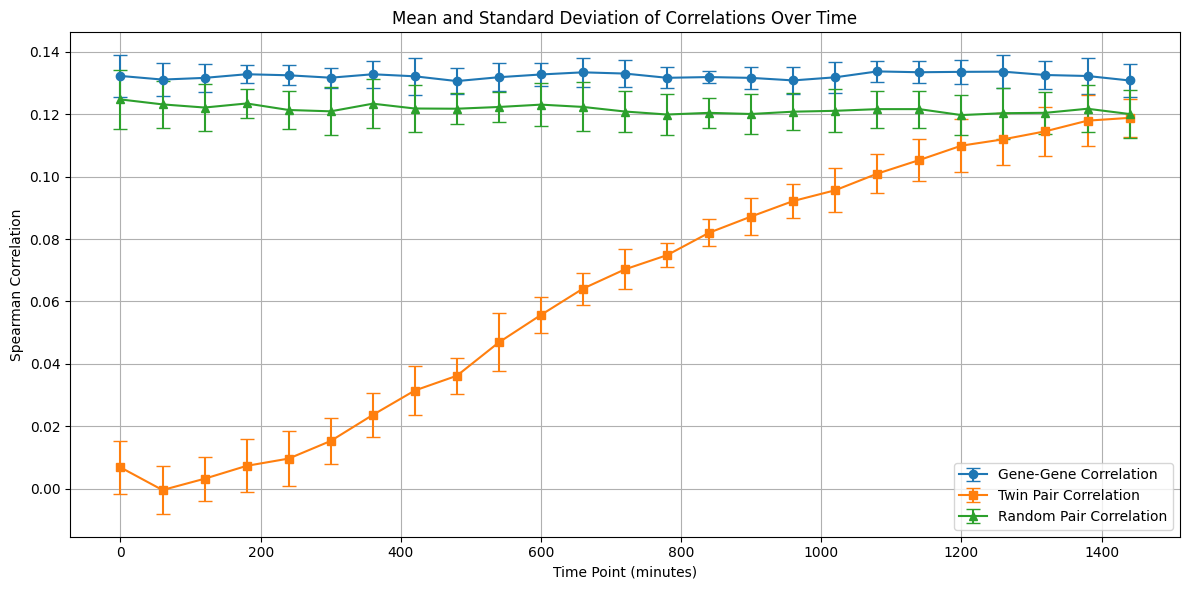

index: 69


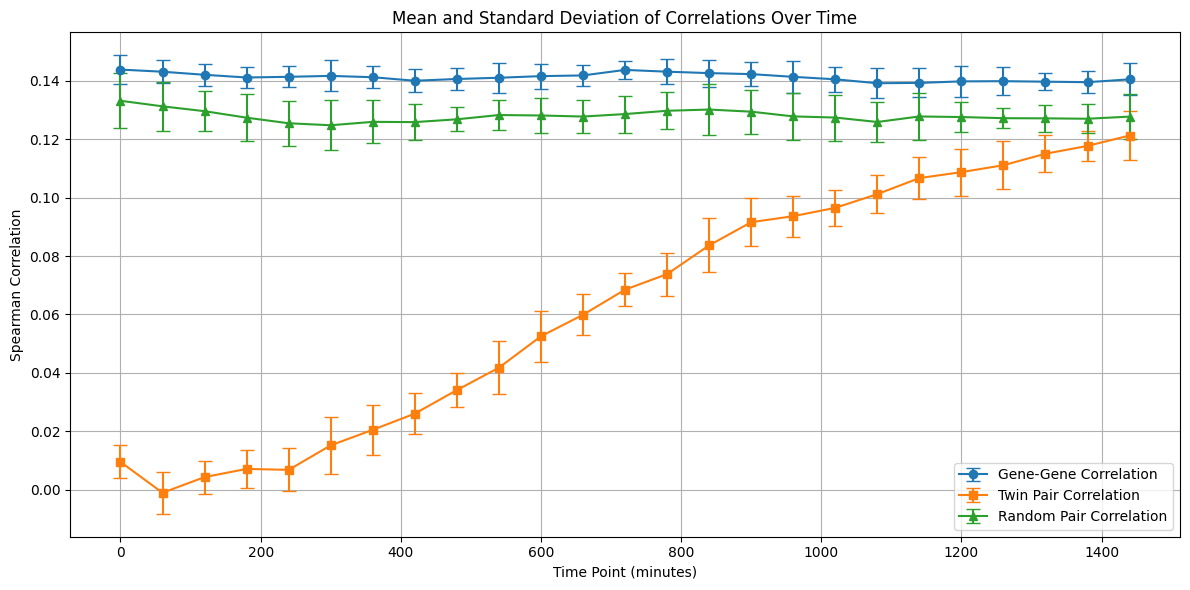

In [32]:
#plot the correlation over time
def plot_correlations_over_time(corr_dict):
    """
    Plot the correlations over time from the correlation DataFrame.
    
    Parameters:
        corr_dict (pd.DataFrame): DataFrame containing correlation data.
    """
    # plt.figure(figsize=(12, 6))
    
    # # Adjust time points to center mean division time at 0
    # adjusted_time = (corr_dict['time_point'] - corr_dict['mean_division_time'].iloc[0]) / 60
    
    # # Plot gene-gene correlation
    # plt.plot(adjusted_time, corr_dict['gene_gene_correlation'], label='Gene-Gene Correlation', marker='o')
    
    # # Plot twin pair correlation
    # plt.plot(adjusted_time, corr_dict['twin_pair_correlation'], label='Twin Pair Correlation', marker='s')
    
    # # Plot random pair correlation
    # plt.plot(adjusted_time, corr_dict['random_pair_correlation'], label='Random Pair Correlation', marker='^')
    
    # # Add mean division time line at 0
    # plt.axvline(x=0, color='red', linestyle='--', label='Mean Division Time', linewidth=1)
    
    # # Add standard deviation lines
    # plt.axvline(x=corr_dict['std_division_time'].iloc[0] / 60, color='red', linestyle=':', linewidth=1, label ='±1 Std Dev')
    # plt.axvline(x=-corr_dict['std_division_time'].iloc[0] / 60, color='red', linestyle=':', linewidth=1)
    
    # # Add threshold lines
    # plt.axhline(y=0.01, color='green', linestyle='--', label='0.1 Threshold', linewidth=1)
    # plt.axhline(y=-0.01, color='green', linestyle='--', linewidth=1)
    
    # plt.xlabel('Time Point (hours, centered at mean division time)')
    # plt.ylabel('Spearman Correlation')
    # plt.title('Correlation Over Time (Mean Division Time Centered)')
    # plt.legend()
    # plt.grid(True)
    # plt.xticks(np.arange(-10, 31, 5))  # Adjust x-axis ticks for centered time
    # plt.xlim(-11, 30)  # Set x-axis limits
    # plt.tight_layout()
    # plt.show()
    # Group by time_point and calculate mean and standard deviation for each correlation type
    grouped_corr = corr_dict.groupby('time_point').agg(
        mean_gene_gene_correlation=('gene_gene_correlation', 'mean'),
        std_gene_gene_correlation=('gene_gene_correlation', 'std'),
        mean_twin_pair_correlation=('twin_pair_correlation', 'mean'),
        std_twin_pair_correlation=('twin_pair_correlation', 'std'),
        mean_random_pair_correlation=('random_pair_correlation', 'mean'),
        std_random_pair_correlation=('random_pair_correlation', 'std')
    ).reset_index()

    # Plot the mean and standard deviation over time
    plt.figure(figsize=(12, 6))

    # Plot gene-gene correlation
    plt.errorbar(grouped_corr['time_point'], grouped_corr['mean_gene_gene_correlation'],
                 yerr=grouped_corr['std_gene_gene_correlation'], label='Gene-Gene Correlation',
                 fmt='o-', capsize=5)

    # Plot twin pair correlation
    plt.errorbar(grouped_corr['time_point'], grouped_corr['mean_twin_pair_correlation'],
                 yerr=grouped_corr['std_twin_pair_correlation'], label='Twin Pair Correlation',
                 fmt='s-', capsize=5)

    # Plot random pair correlation
    plt.errorbar(grouped_corr['time_point'], grouped_corr['mean_random_pair_correlation'],
                 yerr=grouped_corr['std_random_pair_correlation'], label='Random Pair Correlation',
                 fmt='^-', capsize=5)

    plt.xlabel('Time Point (minutes)')
    plt.ylabel('Spearman Correlation')
    plt.title('Mean and Standard Deviation of Correlations Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
corr_dict_list = corr_dict_list.sort_values(by=['index', 'time_point'])
# Plot the correlations over time
for index in corr_dict_list['index'].unique():
    corr_dict = corr_dict_list[corr_dict_list['index'] == index]
    print(f"index: {index}")
    plot_correlations_over_time(corr_dict)

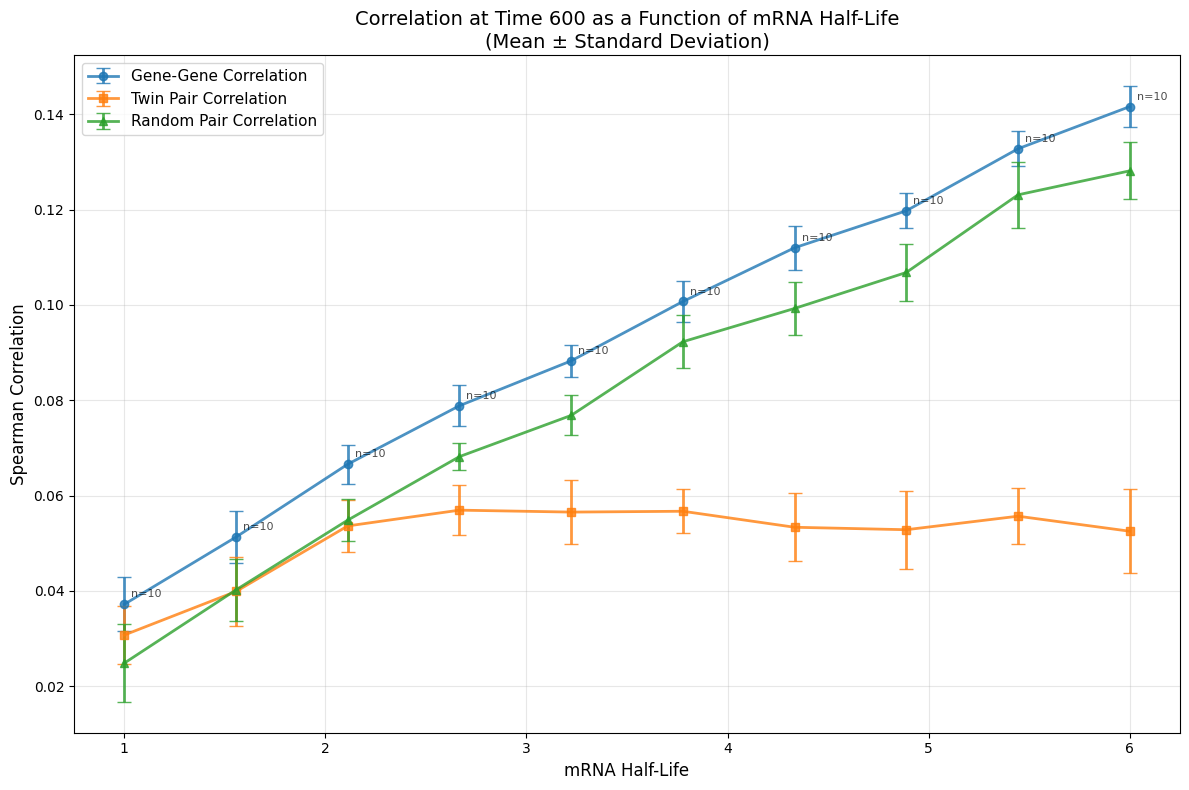

Summary Statistics:
   mrna_half_life_TF  gene_gene_mean  gene_gene_std  gene_gene_count  \
0           1.000000        0.037171       0.005636               10   
1           1.555556        0.051283       0.005455               10   
2           2.111111        0.066570       0.004088               10   
3           2.666667        0.078840       0.004306               10   
4           3.222222        0.088258       0.003362               10   
5           3.777778        0.100717       0.004199               10   
6           4.333333        0.111997       0.004665               10   
7           4.888889        0.119758       0.003642               10   
8           5.444444        0.132771       0.003718               10   
9           6.000000        0.141616       0.004300               10   

   twin_pair_mean  twin_pair_std  random_pair_mean  random_pair_std  
0        0.030724       0.006115          0.024825         0.008144  
1        0.039862       0.007184          0.040

<Figure size 1500x1000 with 0 Axes>

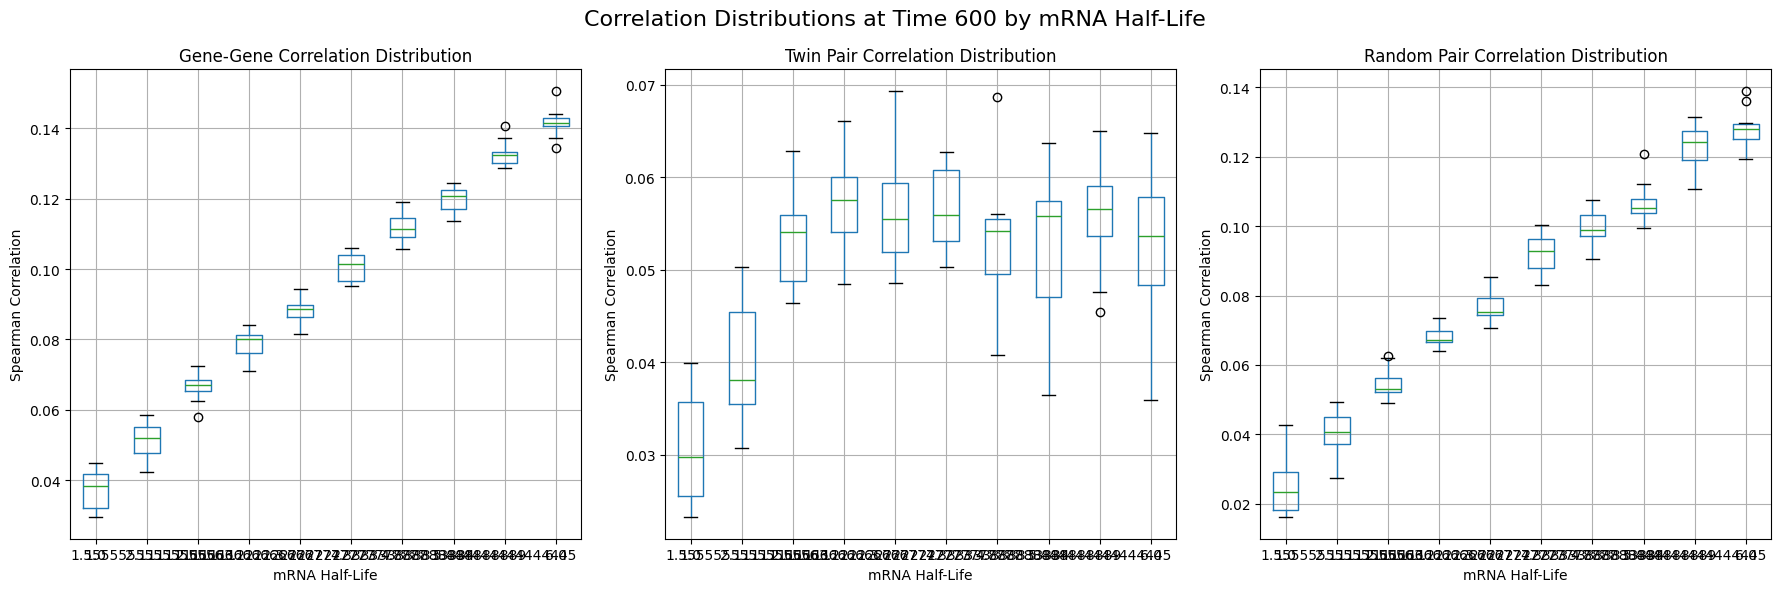

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
param_df = pd.read_csv("/home/mzo5929/Keerthana/grnInference/simulationData/parameter_sweep.csv", index_col=0)
param_df['index'] = param_df.index.astype(str)
param_df = param_df[param_df['index'].isin(corr_dict_list['index'].unique())]

# Merge correlation data with parameter data
merged_df = pd.merge(corr_dict_list, param_df, on='index')

# Filter for time point 300 and group by mRNA_half_life
corr_at_300 = merged_df[merged_df['time_point'] == 600]

# Group by mRNA_half_life and calculate mean and std for each correlation type
grouped_stats = corr_at_300.groupby('mrna_half_life_TF').agg({
    'gene_gene_correlation': ['mean', 'std', 'count'],
    'twin_pair_correlation': ['mean', 'std', 'count'],
    'random_pair_correlation': ['mean', 'std', 'count']
}).reset_index()

# Flatten column names
grouped_stats.columns = ['mrna_half_life_TF', 
                        'gene_gene_mean', 'gene_gene_std', 'gene_gene_count',
                        'twin_pair_mean', 'twin_pair_std', 'twin_pair_count',
                        'random_pair_mean', 'random_pair_std', 'random_pair_count']

# Fill NaN std with 0 (for single data points)
grouped_stats = grouped_stats.fillna(0)

# Plot with error bars
plt.figure(figsize=(12, 8))

# Plot each correlation type with error bars
plt.errorbar(grouped_stats['mrna_half_life_TF'], grouped_stats['gene_gene_mean'], 
            yerr=grouped_stats['gene_gene_std'], 
            label='Gene-Gene Correlation', 
            marker='o', capsize=5, alpha=0.8, linewidth=2)

plt.errorbar(grouped_stats['mrna_half_life_TF'], grouped_stats['twin_pair_mean'], 
            yerr=grouped_stats['twin_pair_std'], 
            label='Twin Pair Correlation', 
            marker='s', capsize=5, alpha=0.8, linewidth=2)

plt.errorbar(grouped_stats['mrna_half_life_TF'], grouped_stats['random_pair_mean'], 
            yerr=grouped_stats['random_pair_std'], 
            label='Random Pair Correlation', 
            marker='^', capsize=5, alpha=0.8, linewidth=2)

plt.xlabel('mRNA Half-Life', fontsize=12)
plt.ylabel('Spearman Correlation', fontsize=12)
plt.title('Correlation at Time 600 as a Function of mRNA Half-Life\n(Mean ± Standard Deviation)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add sample size information
for i, row in grouped_stats.iterrows():
    plt.annotate(f'n={int(row["gene_gene_count"])}', 
                xy=(row['mrna_half_life_TF'], row['gene_gene_mean']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.show()

# Print summary statistics
print("Summary Statistics:")
print(grouped_stats[['mrna_half_life_TF', 'gene_gene_mean', 'gene_gene_std', 'gene_gene_count',
                    'twin_pair_mean', 'twin_pair_std', 'random_pair_mean', 'random_pair_std']])

# Alternative: Box plot version for better visualization of distributions
plt.figure(figsize=(15, 10))

# Create subplots for each correlation type
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gene-Gene Correlation
corr_at_300.boxplot(column='gene_gene_correlation', by='mrna_half_life_TF', ax=axes[0])
axes[0].set_title('Gene-Gene Correlation Distribution')
axes[0].set_xlabel('mRNA Half-Life')
axes[0].set_ylabel('Spearman Correlation')

# Twin Pair Correlation
corr_at_300.boxplot(column='twin_pair_correlation', by='mrna_half_life_TF', ax=axes[1])
axes[1].set_title('Twin Pair Correlation Distribution')
axes[1].set_xlabel('mRNA Half-Life')
axes[1].set_ylabel('Spearman Correlation')

# Random Pair Correlation
corr_at_300.boxplot(column='random_pair_correlation', by='mrna_half_life_TF', ax=axes[2])
axes[2].set_title('Random Pair Correlation Distribution')
axes[2].set_xlabel('mRNA Half-Life')
axes[2].set_ylabel('Spearman Correlation')

plt.suptitle('Correlation Distributions at Time 600 by mRNA Half-Life', fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
merged_df

,time_point,gene_gene_correlation,twin_pair_correlation,random_pair_correlation,run,index,k_on_TF,k_off_TF,burst_size_TF,k_on_Target,...,splicing_half_life_minutes,mrna_half_life_TF,mrna_half_life_Target,protein_half_life,protein_production_rate,labeling_efficiency,pulse_time,num_cells,dynamics,capture_efficiency
0,0,0.040077,0.012466,0.021894,2,60,0.27,8.4,32.0,0.25,...,7,1.0,3.7,28.0,0.059,1,60,20000,MM,1
1,0,0.019523,-0.005827,0.009886,7,60,0.27,8.4,32.0,0.25,...,7,1.0,3.7,28.0,0.059,1,60,20000,MM,1
2,0,0.035865,0.001896,0.027430,1,60,0.27,8.4,32.0,0.25,...,7,1.0,3.7,28.0,0.059,1,60,20000,MM,1
3,0,0.036279,-0.005799,0.026074,6,60,0.27,8.4,32.0,0.25,...,7,1.0,3.7,28.0,0.059,1,60,20000,MM,1
4,0,0.039652,-0.008618,0.022932,4,60,0.27,8.4,32.0,0.25,...,7,1.0,3.7,28.0,0.059,1,60,20000,MM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1440,0.141907,0.129841,0.127491,8,69,0.27,8.4,32.0,0.25,...,7,6.0,3.7,28.0,0.059,1,60,20000,MM,1
2496,1440,0.132201,0.112896,0.121899,6,69,0.27,8.4,32.0,0.25,...,7,6.0,3.7,28.0,0.059,1,60,20000,MM,1
2497,1440,0.140832,0.113312,0.129569,7,69,0.27,8.4,32.0,0.25,...,7,6.0,3.7,28.0,0.059,1,60,20000,MM,1
2498,1440,0.145858,0.129555,0.124285,5,69,0.27,8.4,32.0,0.25,...,7,6.0,3.7,28.0,0.059,1,60,20000,MM,1
